**Student Name**: Maksim Karnaukh
    
**Student ID**: 20201604

# Lab 3: Dynamic Programming

### Instructions: **TODO** tags
The first part of this lab is simply help on theory, in case you had questions. Since you will have to write formulas in $\LaTeX$, it also contains help on this. In the second part you will have to implement Dynamic Programming methods to solve MDPs. The way it will work is very similar to the previous labs.

As usual, please *read* and *run* the notebook chronologically, and fill in the **TODO**s as you encounter them.
* <span style="color:blue"> Blue **TODOs** </span> means you have to implement the TODOs in the code.
* <span style="color:red"> Red **TODOs** </span> means you have to submit an explanation (of graph/results/theory).


At each section, <span style="color:green"> (xx points) </span> indicates the number of points of the entire section (labs are graded out of 10).


## <span style="color:green"> 1. Help on Theory </span>
This part is only meant to be read and is **optional**. It will hopefully give some understanding of the expectations that come up all the time in Dynamic Programming. 

### <span style="color:green"> 1.1. Trajectories and Expectations</span>
*Optional read. This paragraph aims at clarifying why the expectations show up everywhere in the formulas, and what they mean intuitively. If you're interested, give it a read!*

At the heart of Reinforcement Learning is the idea of interactions between Agent and Environment. These interactions give rise to a **trajectory** of 3 alternating elements: state, action, reward; and the next state to repeat the process. A trajectory is therefore 
$$ \tau = \left( S_0, A_0, R_1, S_1, A_1, R_2, S_2... \right) $$
It is crucial to understand that a trajectory is generated by two distributions - from $S_t$ to $A_t$ sampling from the Agent's policy $\pi$, and from $S_t,A_t$ to $R_{t+1},S_{t+1}$ sampling from the Environment's dynamics $p$.

The intuitive goal of RL is to maximize the sum of rewards $\sum_t R_t$ obtained during the trajectory, this is the *return* $G_t$ (starting from some step $t$ and summing over the future steps $t^\prime$). This process is **very chaotic**. We are alternatively and iteratively sampling from two different arbitrary distributions. Therefore, we rather want to maximize the *expected* return. The intuition is that "you can not always get the best results (imagine the environment is "playing poker"), so we focus on doing the best possible on average". The discount does not change the intuition.

The expectations we take are therefore *over the trajectory*, or in other words, *over the alternating samplings from $\pi$ and $p$*. A notation for that is $$\mathbb{E}_{\pi,p}\left[ \cdot \right]$$
Since we have no control over the dynamics $p$, we usually simplify this expression to $\mathbb{E}_{\pi}\left[ \cdot \right]$ to only what we will be changing and optimizing. However, it is important to realize that this expectation also depends on the dynamics $p$.

Hopefully this demystifies a bit the formulas, which can quickly look scary.

### <span style="color:green"> 1.2. One-step Expectations in Bellman Backups </span> 
*Optional read. This paragraph now aims at clarifying the one-step-ahead expectations that come up in most of the Bellman equations*.

You have seen in the course that the core idea of all Bellman equations is the observation that $G_t = R_{t+1} + \gamma G_{t+1}$. The discounted return at this step is a simple function of the reward you will get, and the next return. However, how do we use this fact practically?

The intuition is that you want to look one step ahead in the trajectory. As we know, during one step, there is one sampling from $\pi$ and one sampling from $p$. So what we want to do is break the expectation down into 1/ the next step, 2/ the rest. 

Remember that the general way of taking an expectation for the finite case is $\sum_i p_i x_i$ - in other words, scale each possible output $x_i$ with its probability to happen $p_i$.

How do we take an expectation over a single step in the MDP? Well, imagine that you're sitting on a state $s$. From there, you have a choice of $\left| \mathcal{A} \right|\doteq k$ actions. Which action you take will depend on your policy $\pi$, and that will get you sitting on the corresponding state-action node. So if you wanted to take an expectation of some variable $x$ over actions, you would get $\sum_a \pi\left(a \mid s\right)x_a$.

Now this was just getting us to the state-action node. Now that we are sitting on the state-action node, there's a bunch of things that can happen - all the state-reward pairs that the dynamics can lead us to. Therefore if you wanted to take an expectation of some value $x$ over state-reward pairs from this state-action node, you would get $\sum_{s^ \prime, r} p\left(s^\prime,r \mid s,a\right)x_{s^\prime,r}$. The convenient joint-sum notation means "all possible state-reward pairs". 

Now you're back at a state node, and you can repeat the process if you want. You will have taken an expectation over $x$ of one full step in the MDP: from a state $s$, $\sum_a \pi\left(a \mid s\right) \sum_{s^ \prime, r} p\left(s^\prime,r \mid s,a\right)x_{a,s^\prime,r}$

Most of the time, what we will be interested about is the expected return, so $x$ will be some variation of the return (actual return, expected return, value function...).

### <span style="color:green"> 1.3 Help on $\LaTeX$  </span> 
[Click on this link](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd) to see a whole bunch of usages of inline $\LaTeX$ math.

Below are examples of things you can use in your formulas, if needed. Enter the cell to see and copy-paste the elements.
- Greek letters (capitals or not): $\pi, \Pi$; $\rho$; $\theta, \Theta$; $\delta, \Delta$
- Sets: $\mathbb{N,R}$ $\mathcal{A,S}$
- Underscore and exponent: $x_i ^j$; $e^{i \pi} +1 = 0$
- Prime: $s^\prime$, $\pi^\prime$
- Sum and product: $\sum_{a \in \mathcal{A}}$ $\prod_{t=0}^T u_t v_t$
- Max, argmax and underscoring: $\max_a$, $\underset{a}{\arg \max}$
- Parenthesis and brackets of variable size: $f\left( \sum_i \left[ r_i + x_i\right]\right)$
- Conditional distribution: $f\left( x \mid y \right)$
- Display mode and random helpful things:
$$
\text{we know that } \lim_{x \to c} f(x) = L  \iff  (\forall \varepsilon > 0,\,\exists \ \delta > 0,\,\forall x \in D,\,0 < |x - c| < \delta \ \Rightarrow \ |f(x) - L| < \varepsilon)
$$
- Alignement:
$$
\begin{align}
\left(x+y \right)^2 &= x^2 + xy + yx + y^2
                    &= x^2 + 2xy + y^2
\end{align}
$$
- Arrays:
$$
sign(x) = \left\{
    \begin{array}\\
        1 & \mbox{if } \ x \in \mathbf{N}^* \\
        0 & \mbox{if } \ x = 0 \\
        -1 & \mbox{else.}
    \end{array}
\right.
$$
- Logical reasoning: "therefore": $\therefore$    "is defined as": $\doteq$    "if and only if": $\iff$    "implies": $\implies$

## 2. <span style="color:green"> (7 points) </span>  Dynamic Programming: Policy Iteration
Now we will implement the Value Iteration and Policy Iteration algorithms from the course. 
First, let's import the required libraries and the environment you implemented last time. You don't have anything to do here, this was the subject of the last lab. The MDP might be implemented slightly differently from what you did, it's fine!

In [102]:
import numpy as np
import gym
from gym import spaces
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as clr

In [103]:
# This is the environment you implemented last lab! Nothing to do here.
class CourseEnv(gym.Env):
    """ Gridworld environment from the Course. A 4x3 grid with 2 states in the upper right corner 
    leading to the terminal state.
        """
    def __init__(self):
        self.height = 3
        self.width = 4
        self.action_space = spaces.Discrete(5) # maximum amount of actions possible in a state

        self.observation_space = spaces.Tuple(( # observations come in (x,y) tuples with x:height, y:width.
                spaces.Discrete(self.height),
                spaces.Discrete(self.width)
                ))
        self.moves = { # converts actions to 2D moves
                'north': (-1, 0),
                'east':  (0, 1),
                'south': (1, 0),
                'west' : (0, -1),
                }
        self.moves_list = [ # enables shortcuts in applying noise
                'north',
                'east',
                'south',
                'west',
                ]
        self.noise = .2
        self.start = (2,0)
        self.near_terminals = ((0,3), (1,3)) # arbitrary terminal states
        self.obstacles = [(1,1)]
        self.living_reward = -0.1
        # begin in start state
        self.reset()

    def _move(self, action, state=None):
        """ Moves the agent according to the required action, taking hitboxes into account. """
        dx, dy = self.moves[action]
        if state is None:
            state = self.S
            
        state = state[0] + dx, state[1] + dy

        if state in self.obstacles: # cancel movement
            state = state[0] - dx, state[1] - dy            
        
        # Finally, setting the agent back into the grid if fallen out
        state = (max(0, state[0]), max(0, state[1]))
        state = (min(state[0], self.height - 1),
                 min(state[1], self.width - 1))

        return state

    def step(self, action):
        """ Moves the agent in the action direction.
            """
        if self.S == 'TERMINAL':
            raise ValueError("Trying to step from TERMINAL state.")

        if self.S in self.near_terminals:
            assert action == 'exit', "Non-exit action in state {}".format(self.S)
            if self.S == self.near_terminals[0]: # rewarding state
                return 'TERMINAL', +1, True, {}
            if self.S == self.near_terminals[1]: # punishing state
                return 'TERMINAL', -1, True, {}
            
        assert action in self.moves_list, "invalid action {} in state {}".format(action, self.S)
        # Otherwise, moving according to action.
        # First, maybe apply some noise:
        if np.random.rand() < self.noise: # Apply noise!
            action = self.moves_list[(self.moves_list.index(action)+np.random.choice((-1,1))) % 4]
        
        print("action executed: {}".format(action))
        self.S = self._move(action)
        
        # Returns; anything brings a reward of living
        return self.S, self.living_reward, self.S == 'TERMINAL', {}

    def reset(self):
        self.S = self.start
        return self.S
    
    def available_actions(self, state=None):
        """
        List of available actions in the provided state
        Parameters
        ----------
        state: tuple (position), string ('TERMINAL') or None
            state from which to provide all actions. If None, use the current environment state.
        Returns
        -------
        ret : list
            List of all actions available in the provided state.
        """
        if state is None:
            state = self.S
        if state == 'TERMINAL':
            return []
        if state in self.near_terminals:
            return ['exit']
        
        return self.moves_list
    
    def p(self, state, action):
        """
        Dynamics function p of the MDP in this state and action.
        Parameters
        ----------
        state: tuple (position) or string ('TERMINAL')
            state from which to provide all actions. If the terminal state is provided, raises an error, 
            as there are no dynamics from the terminal state. 
        action: string 
            in list in ['north', 'east', 'south', 'west', 'exit'] with proper state
        Returns
        -------
        ret : dict
            dictionary of (next_state, reward) pairs with: corresponding probabilities
        """
        # Terminal state: return error
        assert state != 'TERMINAL', "asking for dynamics from terminal state"
        # Near terminal state
        if state in self.near_terminals:
            assert action == 'exit', "Non exit action ({}) in near terminal state".format(action)
            if state == self.near_terminals[0]:
                return {('TERMINAL', +1): 1.}
            if state == self.near_terminals[1]:
                return {('TERMINAL', -1): 1.}
        # Other states: 3 possibilities: normal development of the action doing its job, or noise hindering        
        action_n1 = self.moves_list[(self.moves_list.index(action)-1) % 4] # noise-impacted action 1
        action_n2 = self.moves_list[(self.moves_list.index(action)+1) % 4] # noise-impacted action 2
        d = {}
        # The main problem is to make sure you're not counting the same state-reward pair twice
        # instead of summing the probabilities
        d[(self._move(action, state), self.living_reward)] = 1-self.noise
        sr2 = (self._move(action_n1, state), self.living_reward)
        if sr2 in d.keys():
            d[sr2] += self.noise/2
        else:
            d[sr2] = self.noise/2
        
        sr3 = (self._move(action_n2, state), self.living_reward)
        if sr3 in d.keys():
            d[sr3] += self.noise/2
        else:
            d[sr3] = self.noise/2
        return d
    
    def is_terminal(self, state=None):
        if state is None:
            state = self.S
        return state == 'TERMINAL'
    
    def states(self):
        states = [(x,y) for x in range(self.height) for y in range(self.width) if (x,y) not in self.obstacles]
        states += ['TERMINAL']
        return states
        
    def render(self):
        s = np.zeros((self.height, self.width), dtype=int).astype(str)
        s[self.start] = 'S'
        s[self.obstacles[0]] = 'X'
        s[self.near_terminals[0]] = '+'
        s[self.near_terminals[1]] = '-'
        s[self.S] = '.'
        
        print(self.S)
        print(s)
        print("Available actions: {}".format(self.available_actions()))

These functions will be useful to plot your Value function and visualize what's happening.

In [104]:
# Nothing to do here. 
def to_np(value_dict):
    """ Turns a value dictionary of our CourseEnv into a numpy array."""
    grid = np.zeros((3,4))
    for k,v in value_dict.items():
        if type(k) is not str:
            grid[k] = v
            
    return grid

def plot_value_policy(agent):
    """ Visualizes a policy and value function given an agent with V and policy."""
    cmap = clr.LinearSegmentedColormap.from_list('mycmap', ['#FF0000','#000000', '#008000'])
    grid = to_np(agent.V)
    fig, ax = plt.subplots()
    im = ax.imshow(grid, cmap=cmap)
    for i in range(agent.mdp.height):
        for j in range(agent.mdp.width):
            s = (i,j)
            if s not in agent.mdp.obstacles:
                text = ax.text(j, i, agent.policy(s) + "\n{:04.2f}".format(agent.V[s]),
                               ha="center", va="center", color="w")

    ax.set_title("Value and Policy visualization")
    fig.tight_layout()
    plt.show()


### 2.1. <span style="color:red"> **TODO** </span> Policy Improvement Theorem
As a reminder, the Policy Iteration and Value Iteration algorithms are applications of the Policy Improvement Theorem. The theorem states that to get an optimal policy, you can simply alternate **Policy Evaluation**, i.e. estimating the vaue $v_\pi$ of the current policy $\pi$, and **Value Improvement**, i.e. improving on $\pi$ by using a greedy policy over $v_\pi$

- **Policy Evaluation** is using the *Bellman backup operation*. It is simply an iterative version of the Bellman equation for the value function (BEVF): since we know it is a contraction converging to $v_\pi$, we keep applying it. The BEVF might seem complicated, but can be visualized simply using the *backup diagram* of the value function: 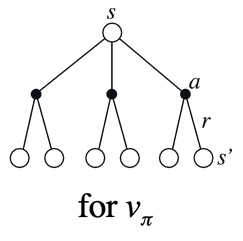 In this graph, multiple brances branching out from a node (either a state or state-action node) means doing an *expectation* over the relevant distribution (policy from a state, dynamics from a state-action pair). If you want to visualize how to get from the backup diagram to the formula, [we did an animation](https://www.youtube.com/watch?v=1p7Zgy79cSo)!
- **Policy Improvement** is creating a policy $\pi^\prime$ that improves on current policy $\pi$. This can be done, according to the *Policy Improvement Theorem*, simply by acting greedily over the value function of $\pi$, $v_\pi$.

**Answer** the following questions about Policy Iteration:
- <span style="color:red"> **TODO** </span>: Write in [$\LaTeX$](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd) the iterative formula for Policy Evaluation in a given state $s$.
$$ \text{your answer here} $$
- <span style="color:red"> **TODO** </span>: Write in [$\LaTeX$](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd) the formula for Policy Improvement in a given state s, as a function of the state-action value function $q_\pi$.
$$ \text{your answer here} $$

### <span style="color:green"> Note on Agent Evaluation </span>
Policy Iteration and Value Iteration can be tricky to compare, because they use different backups and convergence methods. In this lab, we will count the number of **sweeps** over the state space that the algorithm needed to do to converge. In other words, doing the following:
```
for s in mdp.states():
    # some operation
```
is considered a single sweep over the state space.

### 2.2. <span style="color:blue"> **TODO** </span> Policy Iteration
Policy Iteration does Policy Evaluation until some arbitrary precision $\delta$, followed by one step of policy improvement, iteratively. Unlike Value Iteration, it maintains an explicit policy. This policy is *deterministic*: it always picks the same action given the same state - in other words, the distribution is an [indicator](https://en.wikipedia.org/wiki/Indicator_function) of action $a$. Having a deterministic policy makes the Policy Evaluation steps shorter.

- <span style="color:red"> **TODO** </span>: **Adapt** the iterative formula for Policy Evaluation to a deterministic policy. **Why** is this step faster than for a non-deterministic policy?
$$ \text{your answer here} $$
<br/> (your answer here)
- <span style="color:red"> **TODO** </span>: **When** does the Policy Iteration algorithm stop? <br/> (your answer here)

- <span style="color:blue"> **TODO** </span> **implement** below the Policy Iteration algorithm. Apply your Policy Evaluation steps until $\left|\left| v_{k+1} - v_k \right|\right|_\infty < \delta$. ([infinity norm reminder](https://en.wikipedia.org/wiki/Norm_%28mathematics%29#Maximum_norm_(special_case_of:_infinity_norm,_uniform_norm,_or_supremum_norm))). **Please use** the dictionary `self.pi` for the policy and the dictionary `self.V` for the values, so that we can print them easily. **Please use** the `plot_value_policy(self)` method for plotting the current state of the algorithm *at the end of each Policy Evaluation*. 

In [105]:
import copy

class PolicyIteration():
    """ Dynamic Programming Agent that performs Policy Iteration."""

    def __init__(self, mdp):
        self.mdp = mdp # MDP we're trying to solve
        self.gamma = 0.9
        self.V = {} # values dictionary
        self.pi = {} # policy dictionary
        # DONE: initialize your value and policy dictionaries. The policy should be random.
        self.V = {s: 0 for s in mdp.states()}
        self.pi = {s: np.random.choice(self.mdp.available_actions(s)) for s in self.mdp.states() if not self.mdp.is_terminal(s)}
        
        # Plotting. You can use this method in the `run` method as well.
        # print("Initial Value and Policy:")
        # plot_value_policy(self)

    def policy(self,s):
        return self.pi[s]
    
    def inf_norm(self, v1, v2):
        return max([abs(v1[s] - v2[s]) for s in self.mdp.states() if not self.mdp.is_terminal(s)])

    def run(self, delta=1e-5):
        """
        Runs the Policy Iteration algorithm until convergence. 
        The Policy Evaluation steps are run until inf norm < delta.
        Parameters
        ----------
        delta: float
            Precision required to exit Policy Evaluation, in terms of inf norm.
        Returns
        -------
        sweeps : int
            Number of performed sweeps over the state space
        """
        sweeps = 0
        # DONE: Implement the Policy Iteration algorithm.
        
        while True:
            # Policy Evaluation
            previous_V = copy.deepcopy(self.V)
            while True:
                for s in self.mdp.states():
                    if not self.mdp.is_terminal(s):
                        self.V[s] = sum([p * (r + self.gamma * self.V[s_]) for (s_, r), p in self.mdp.p(s, self.pi[s]).items()])
                        
                if self.inf_norm(self.V, previous_V) < delta:
                    break
                previous_V = copy.deepcopy(self.V)
                sweeps += 1
                    
            # Policy Improvement
            policy_stable = True
            for s in self.mdp.states():
                if not self.mdp.is_terminal(s):
                    old_action = self.pi[s]
                    max_action = -np.inf
                    for a in self.mdp.available_actions(s):
                        q = sum([p * (r + self.gamma * self.V[s_]) for (s_, r), p in self.mdp.p(s, a).items()])
                        if q > max_action:
                            max_action = q
                            self.pi[s] = a
                    if old_action != self.pi[s]:
                        policy_stable = False
            if policy_stable:
                break
            
            sweeps += 1
        return sweeps

Initial Value & Policy:


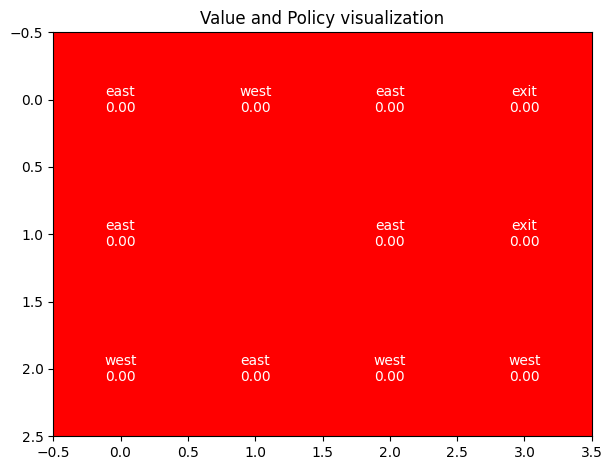

In [106]:
# Initialize and Visualize
mdp = CourseEnv()
agent = PolicyIteration(mdp)
print("Initial Value & Policy:")
plot_value_policy(agent)

Final Value & Policy:


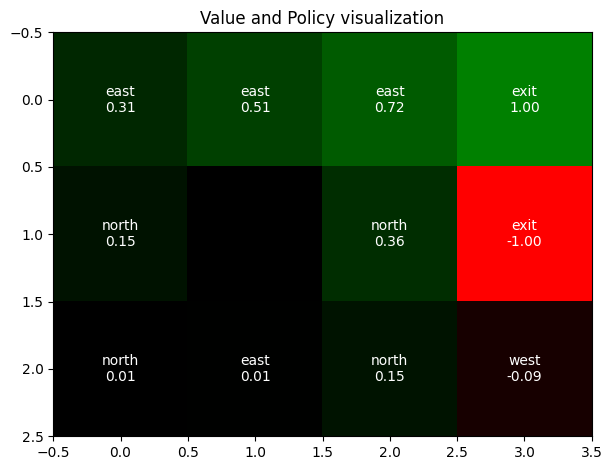

Done in 64 sweeps over the state space.


In [107]:
# Run and Visualize
sweeps = agent.run(delta=1e-3)
print("Final Value & Policy:")
plot_value_policy(agent)
print("Done in {} sweeps over the state space.".format(sweeps))

<span style="color:red"> **TODO** </span> **Discuss** briefly your approach and the results you obtained.

(your answer here)

## 3. <span style="color:green"> (3 points) </span> Value Iteration 
### 3.1.  <span style="color:blue"> **TODO** </span> Classical Value Iteration

While Policy Iteration performs Policy Evaluation until convergence, and one step of Policy Improvement, Value Iteration alternates a single step of each. Due to this, we can actually introduce the Policy Improvement step directly in the formula of Policy Evaluation.

- <span style="color:red"> **TODO** </span> : **Show** in [$\LaTeX$](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd) how to combine a step of Policy Improvement and Policy Evaluation to obtain the iterative formula for Value Iteration in a given state $s$.
$$ \text{your answer here} $$

- **Explain** the differences in algorithm complexity and approach between Policy Iteration and Value Iteration. <br/> (your answer here) 
- <span style="color:blue"> **TODO** </span> **implement** below the Value Iteration algorithm. Apply it until $\left|\left| v_{k+1} - v_k \right|\right|_\infty < \delta$. ([infinity norm reminder](https://en.wikipedia.org/wiki/Norm_%28mathematics%29#Maximum_norm_(special_case_of:_infinity_norm,_uniform_norm,_or_supremum_norm))) Be careful, **this is not yet the Asynchronous version**! **Please use** the dictionary `self.V` for the values, so that we can print them easily. **Please use** the `plot_value_policy(self)` method for plotting the current state of the algorithm *every 10th sweep*. 

In [108]:
class ValueIteration():
    """ Dynamic Programming Agent that performs ValueIteration."""

    def __init__(self, mdp):
        self.mdp = mdp # MDP we're trying to solve
        self.gamma = 0.9
        self.V = {} # values dictionary
        # DONE: Initialize the values dictionary
        self.V = {s: 0 for s in mdp.states()}
        
    def inf_norm(self, v1, v2):
        return max([abs(v1[s] - v2[s]) for s in self.mdp.states() if not self.mdp.is_terminal(s)])

    def policy(self, s):
        """
        Policy of the Agent; in other words, returns the action chosen by ValueIteration in a given state.
        Parameters
        ----------
        s: State (tuple or str)
            State from which to pick an action.
        Returns
        -------
        action : int
            Chosen action within the action space.
        """
        # DONE: Implement the implicit policy of the Value Iteration algorithm.
        max_action = -np.inf
        action = None
        for a in self.mdp.available_actions(s):
            q = sum([p * (r + self.gamma * self.V[s_]) for (s_, r), p in self.mdp.p(s, a).items()])
            if q > max_action:
                max_action = q
                action = a
        return action
    
    def run(self, delta=1e-5):
        """
        Runs the Value Iteration algorithm until convergence. 
        The iterations are ran until inf norm < delta.
        Parameters
        ----------
        delta: float
            Precision required to exit the algo, in terms of inf norm.
        Returns
        -------
        sweeps : int
            Number of performed sweeps over the state space
        """
        sweeps = 0
        # DONE: Implement the Value Iteration algorithm.
        previous_V = copy.deepcopy(self.V)
        while True:
            for s in self.mdp.states():
                if not self.mdp.is_terminal(s):
                    max_action = -np.inf
                    for a in self.mdp.available_actions(s):
                        q = sum([p * (r + self.gamma * self.V[s_]) for (s_, r), p in self.mdp.p(s, a).items()])
                        if q > max_action:
                            max_action = q
                    self.V[s] = max_action
            if self.inf_norm(self.V, previous_V) < delta:
                break
            previous_V = copy.deepcopy(self.V)
            sweeps += 1

        return sweeps
    

Initial Value & Policy:


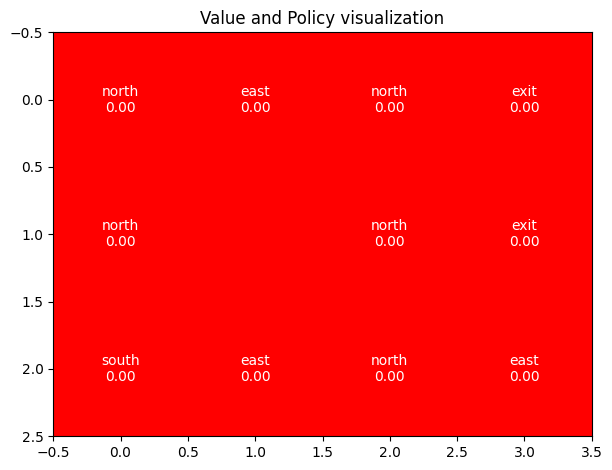

In [109]:
# Initialize and Visualize
mdp = CourseEnv()
agent = ValueIteration(mdp)
print("Initial Value & Policy:")
plot_value_policy(agent)

Final Value & Policy:


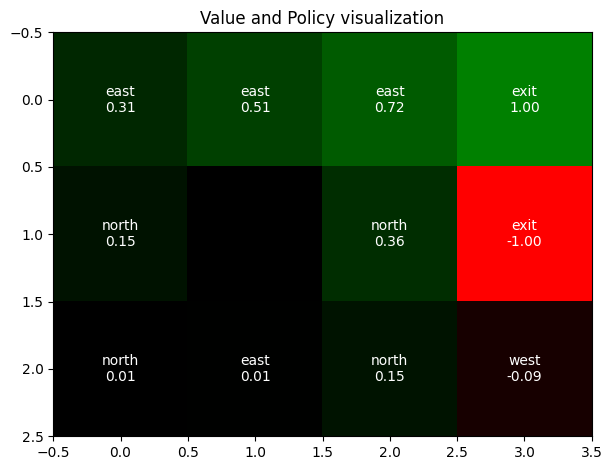

Done in 9 sweeps over the state space.


In [110]:
# Run and Visualize
sweeps = agent.run(delta=1e-3)
print("Final Value & Policy:")
plot_value_policy(agent)
print("Done in {} sweeps over the state space.".format(sweeps))

<span style="color:red"> **TODO** </span> **Discuss** briefly your approach and the results you obtained.

(your answer here)

### 3.2.<span style="color:blue"> **TODO** </span> Asynchronous Value Iteration: *In-Place*
The ValueIteration algorithm we just implemented uses our $v$ estimate from the *previous iteration*, $v_k$, to perform the backup. However, we might have more recent value, in the sweep that is currently occurring. Why not use the best value estimate? This is called **In Place** Value Iteration, and is one of the simplest ideas of **Asynchronous** Dynamic Programming, where the order of the states and estimates used for the backups can be chosen more smartly than the naive sweeps we have done so far.

* <span style="color:blue"> **TODO** </span> **Implement** the changes to Value Iteration discussed above to obtain an In-Place Value Iteration algorithm.

In [111]:
class InPlaceValueIteration(ValueIteration):
    # TODO: Implement the changes to ValueIteration to make it In-Place.
    raise NotImplementedError("TODO: Implement the changes to ValueIteration to make it In-Place.")

NotImplementedError: TODO: Implement the changes to ValueIteration to make it In-Place.

In [ ]:
# Initialize and Visualize
mdp = CourseEnv()
agent = InPlaceValueIteration(mdp)
print("Initial Value & Policy:")
plot_value_policy(agent)

In [ ]:
# Run and Visualize
sweeps = agent.run(delta=1e-3)
print("Final Value & Policy:")
plot_value_policy(agent)
print("Done in {} sweeps over the state space.".format(sweeps))

<span style="color:red"> **TODO** </span> **Explain** briefly your approach and the results you obtained.

(your answer here)